In [187]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [188]:
df=pd.read_csv('laptops.csv',sep=',',encoding='latin-1',index_col=0)

In [189]:
df.head().T

,1,2,3,4,5
Company,Apple,Apple,HP,Apple,Apple
Product,MacBook Pro,Macbook Air,250 G6,MacBook Pro,MacBook Pro
TypeName,Ultrabook,Ultrabook,Notebook,Ultrabook,Ultrabook
Inches,13.3,13.3,15.6,15.4,13.3
ScreenResolution,IPS Panel Retina Display 2560x1600,1440x900,Full HD 1920x1080,IPS Panel Retina Display 2880x1800,IPS Panel Retina Display 2560x1600
Cpu,Intel Core i5 2.3GHz,Intel Core i5 1.8GHz,Intel Core i5 7200U 2.5GHz,Intel Core i7 2.7GHz,Intel Core i5 3.1GHz
Ram,8GB,8GB,8GB,16GB,8GB
Memory,128GB SSD,128GB Flash Storage,256GB SSD,512GB SSD,256GB SSD
Gpu,Intel Iris Plus Graphics 640,Intel HD Graphics 6000,Intel HD Graphics 620,AMD Radeon Pro 455,Intel Iris Plus Graphics 650
OpSys,macOS,macOS,No OS,macOS,macOS


In [190]:
backup=df.copy()

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 1 to 1320
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price_euros       1303 non-null   float64
dtypes: float64(2), object(10)
memory usage: 132.3+ KB


In [192]:
df.isnull().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [193]:
df['Product'].nunique()

618

In [194]:
df.drop('Product',axis=1,inplace=True)

In [195]:
df['Ram']=df['Ram'].str.replace('GB','').astype(int)

In [196]:
df['Weight']=df['Weight'].str.replace('kg','').astype(float)

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 1 to 1320
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price_euros       1303 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 122.2+ KB


# EDA

In [198]:
df.describe()

,Inches,Ram,Weight,Price_euros
count,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017191,8.382195,2.038734,1123.686992
std,1.426304,5.084665,0.665475,699.009043
min,10.100000,2.000000,0.690000,174.000000
25%,14.000000,4.000000,1.500000,599.000000
50%,15.600000,8.000000,2.040000,977.000000
75%,15.600000,8.000000,2.300000,1487.880000
max,18.400000,64.000000,4.700000,6099.000000


In [199]:
df.rename(columns={'Price_euros': 'price'}, inplace=True)

price is right skewed with skewness 1.5208655681688525


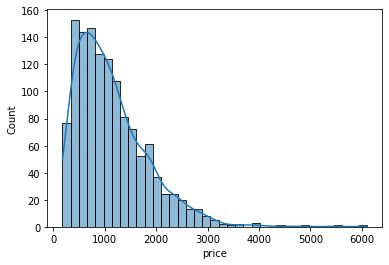

In [200]:
sns.histplot(df['price'],kde=True);
print('price is right skewed with skewness',df['price'].skew())

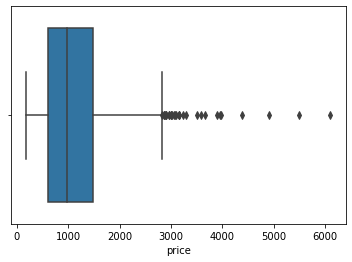

In [201]:
sns.boxplot(x=df['price']);

In [202]:
df['price'].quantile([0.95,0.96,0.97,0.98,0.99,1])

0.95    2448.6000
0.96    2535.1740
0.97    2711.2200
0.98    2868.5504
0.99    3148.9674
1.00    6099.0000
Name: price, dtype: float64

In [203]:
df[df['price']>4000]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price
200,Razer,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32,1TB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49,6099.0
617,Lenovo,Notebook,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Xeon E3-1535M v6 3.1GHz,32,1TB SSD,Nvidia Quadro M2200M,Windows 10,2.50,4899.0
758,HP,Workstation,17.3,IPS Panel Full HD 1920x1080,Intel Xeon E3-1535M v5 2.9GHz,16,256GB SSD,Nvidia Quadro M2000M,Windows 7,3.00,4389.0
839,Razer,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32,512GB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49,5499.0


Target variable price is right skewed and most of the laptops are priced around 25k-1.5l

In [204]:
df['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

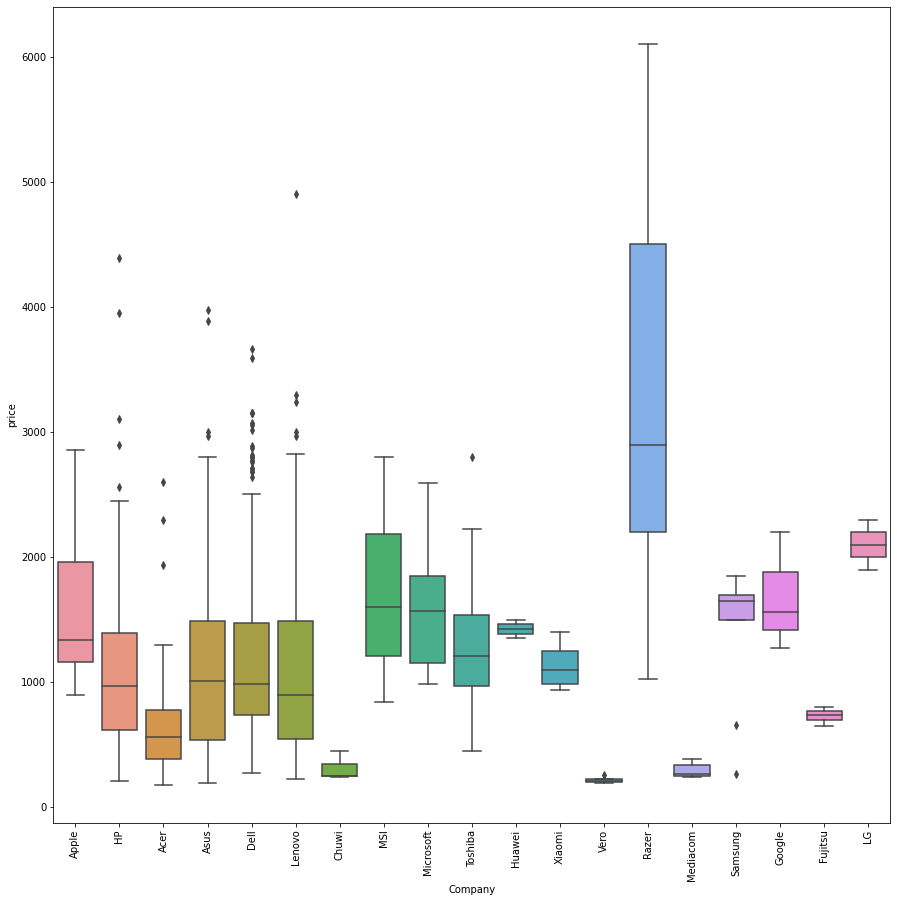

In [205]:
plt.figure(figsize=(15,15))
sns.boxplot(y='price',data=df,x='Company');
plt.xticks(rotation='vertical');

Most of the brands have broad price range.However vero,Huawei,Mediacom,Fujitsu,chuwi have narrow price range and highest priced laptop is from Razer

Exploring relationship of price with Type of laptop

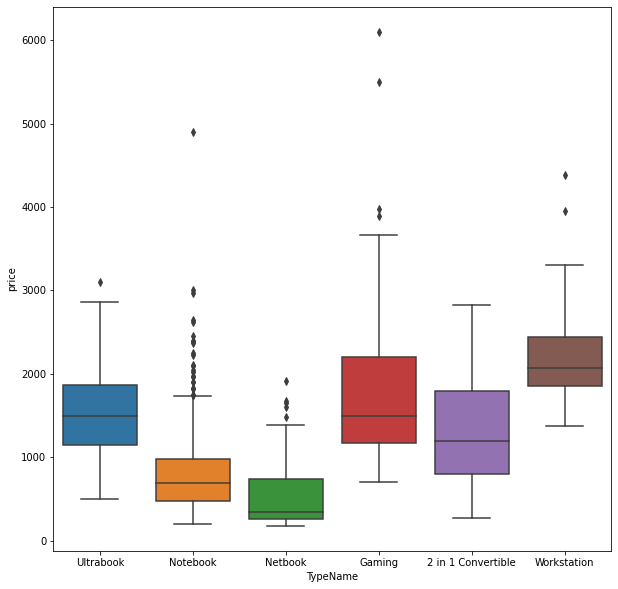

In [206]:
plt.figure(figsize=(10,10))
sns.boxplot(x='TypeName',y='price',data=df);

Gaming laptops tend to be  in higher price range than others and Netbook seems to be relatively cheaper

Price vs Ram

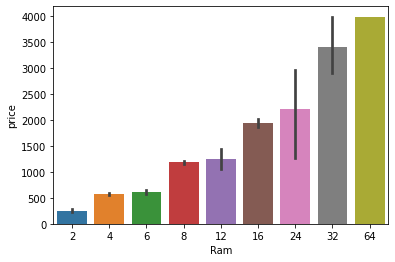

In [207]:
sns.barplot(x='Ram',y='price',data=df);

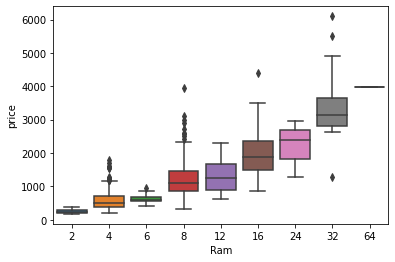

In [208]:
sns.boxplot(x='Ram',y='price',data=df);

In [209]:
df['Ram'].value_counts()

8     619
4     375
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: Ram, dtype: int64

In [210]:
df=df[df['Ram']!=64]

Most of the laptops are around 15.6 inches


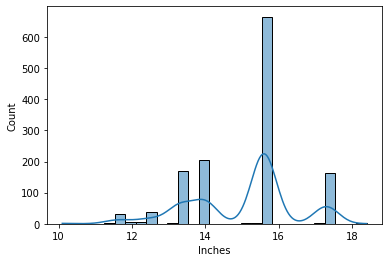

In [211]:
sns.histplot(df['Inches'],kde=True);
print('Most of the laptops are around',df['Inches'].mode()[0],'inches')

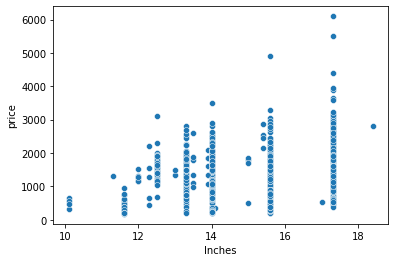

In [212]:
sns.scatterplot(x='Inches',y='price',data=df);

most of the laptops weigh around 2.2 kg


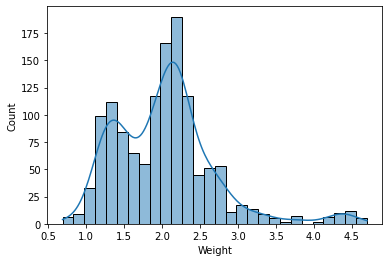

In [213]:
sns.histplot(df['Weight'],kde=True);
print('most of the laptops weigh around',df['Weight'].mode()[0],'kg')

In [214]:
df[df['Weight']>3]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price
48,Asus,Gaming,17.3,Full HD 1920x1080,AMD Ryzen 1700 3GHz,8,256GB SSD + 1TB HDD,AMD Radeon RX 580,Windows 10,3.20,1299.0
181,MSI,Gaming,18.4,Full HD 1920x1080,Intel Core i7 6920HQ 2.9GHz,32,512GB SSD + 1TB HDD,Nvidia GTX 980 SLI,Windows 10,4.40,2799.0
200,Razer,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32,1TB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49,6099.0
202,HP,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,3.35,1379.0
207,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,3.20,1749.0
...,...,...,...,...,...,...,...,...,...,...,...
1207,Acer,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.20,2599.0
1215,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,512GB SSD + 1TB HDD,Nvidia GeForce GTX 980M,Windows 10,4.30,2150.0
1226,Acer,Notebook,17.3,1600x900,Intel Core i3 6006U 2.0GHz,8,1TB HDD,Nvidia GeForce 940MX,Windows 10,3.30,629.0
1234,Acer,Notebook,17.3,1600x900,Intel Core i3 6006U 2GHz,4,1TB HDD,Nvidia GeForce 940MX,Windows 10,3.30,598.0


In [215]:
df['OpSys'].value_counts()

Windows 10      1071
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [216]:
def operating_system(x):
    if x == 'Windows 10' or x== 'Windows 7' or x == 'Windows 10 S':
        return 'Windows'
    elif x== 'macOS' or x== 'Mac OS X':
        return 'Mac'
    else:
        return 'Others'

In [217]:
df['OS']=df['OpSys'].apply(lambda x:operating_system(x))

In [218]:
df['OS'].value_counts()

Windows    1124
Others      157
Mac          21
Name: OS, dtype: int64

In [219]:
df.drop('OpSys',axis=1,inplace=True)

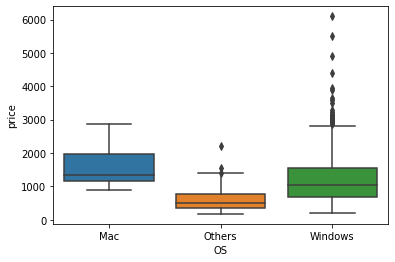

In [220]:
sns.boxplot(x=df['OS'],y=df['price']);

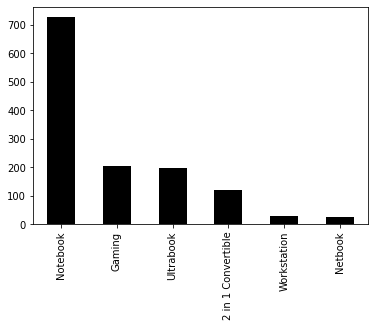

In [221]:
df['TypeName'].value_counts().plot(kind='bar',color='black');

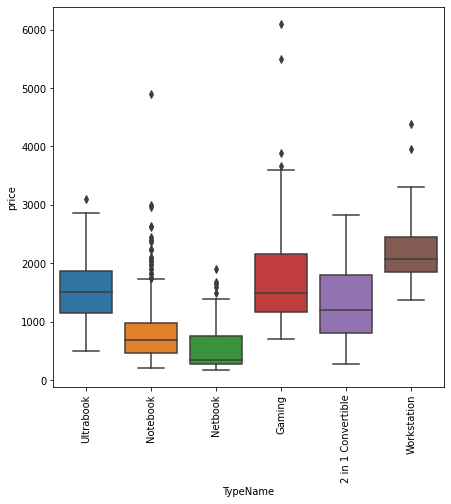

In [222]:
plt.figure(figsize=(7,7))
sns.boxplot(x=df['TypeName'],y=df['price']);
plt.xticks(rotation='vertical')
plt.show()

##Dealing with CPU feature

In [223]:
df['cpu_name']=df['Cpu'].str.split(' ').str.slice(0,3).str.join('')

In [224]:
df['cpu_name'].value_counts()

IntelCorei7               526
IntelCorei5               423
IntelCorei3               136
IntelCeleronDual           80
IntelPentiumQuad           27
IntelCoreM                 19
AMDA9-Series9420           12
IntelCeleronQuad            8
AMDA6-Series9220            8
AMDA12-Series9720P          7
IntelAtomx5-Z8350           5
AMDA8-Series7410            4
IntelAtomx5-Z8550           4
IntelPentiumDual            3
AMDA9-Series9410            3
AMDRyzen1700                3
AMDA9-SeriesA9-9420         2
AMDA10-Series9620P          2
IntelAtomX5-Z8350           2
AMDE-SeriesE2-9000e         2
IntelXeonE3-1535M           2
IntelXeonE3-1505M           2
AMDE-Series7110             2
AMDA10-Series9600P          2
AMDA6-SeriesA6-9220         2
AMDA10-SeriesA10-9620P      2
AMDRyzen1600                1
IntelAtomx5-Z8300           1
AMDE-SeriesE2-6110          1
AMDFX9830P                  1
AMDE-SeriesE2-9000          1
AMDA6-Series7310            1
IntelAtomZ8350              1
AMDA12-Ser

In [225]:
def processor(x):
    if x == 'IntelCorei7' or x == 'IntelCorei5' or x == 'IntelCorei3':
        return x
    else:
        if x.split()[0] == 'Intel':
            return 'Other Intel'
        else:
            return 'AMD'

In [226]:
df['cpu_comp'] = df['cpu_name'].apply(processor)

In [227]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,price,OS,cpu_name,cpu_comp
1,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,1.37,1339.69,Mac,IntelCorei5,IntelCorei5
2,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,1.34,898.94,Mac,IntelCorei5,IntelCorei5
3,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,1.86,575.00,Others,IntelCorei5,IntelCorei5
4,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,1.83,2537.45,Mac,IntelCorei7,IntelCorei7
5,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,1.37,1803.60,Mac,IntelCorei5,IntelCorei5


In [228]:
df.drop(['cpu_name','Cpu'],axis=1,inplace=True)

In [229]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,Weight,price,OS,cpu_comp
1140,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,8,256GB SSD,Intel HD Graphics 520,1.8,1669.0,Windows,IntelCorei7


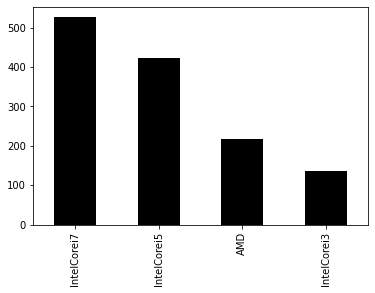

In [230]:
df['cpu_comp'].value_counts().plot(kind='bar',color='black');

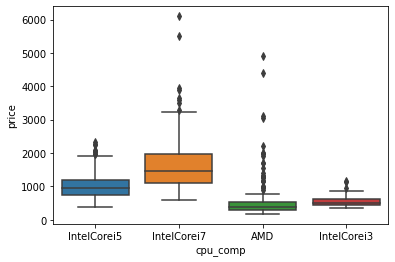

In [231]:
sns.boxplot(x='cpu_comp',y='price',data=df);

##Dealing with GPU

In [232]:
df['Gpu'].value_counts().tail(20)

AMD Radeon Pro 455           1
Intel Iris Pro Graphics      1
AMD Radeon Pro 555           1
AMD Radeon Pro 560           1
AMD R4 Graphics              1
AMD Radeon RX 560            1
Nvidia GTX 980 SLI           1
AMD R17M-M1-70               1
Intel Iris Graphics 550      1
Nvidia GeForce GTX 940M      1
AMD FirePro W5130M           1
Intel HD Graphics 530        1
Nvidia GeForce GTX1080       1
Nvidia GeForce GTX1050 Ti    1
Nvidia Quadro M620M          1
Intel Graphics 620           1
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
ARM Mali T860 MP4            1
Name: Gpu, dtype: int64

In [233]:
df['Gpu_comp']=df['Gpu'].str.split(' ').str.get(0)

In [234]:
df.drop('Gpu',axis=1,inplace=True)

In [235]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Weight,price,OS,cpu_comp,Gpu_comp
263,MSI,Gaming,17.3,Full HD 1920x1080,16,512GB SSD + 1TB HDD,4.14,2499.0,Windows,IntelCorei7,Nvidia


In [236]:
df['Gpu_comp'].value_counts()

Intel     722
Nvidia    399
AMD       180
ARM         1
Name: Gpu_comp, dtype: int64

In [237]:
df=df[df['Gpu_comp']!='ARM']

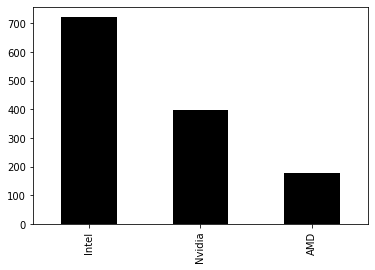

In [238]:
df['Gpu_comp'].value_counts().plot(kind='bar',color='black');

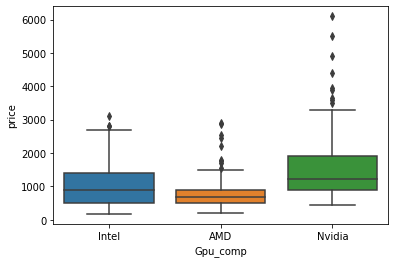

In [239]:
sns.boxplot(x='Gpu_comp',y='price',data=df);

##Dealing with Screen Resolution

In [240]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      229
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [241]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [242]:
df['Ips_display'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [243]:
df.drop('ScreenResolution',axis=1,inplace=True)

In [244]:
df.sample()

,Company,TypeName,Inches,Ram,Memory,Weight,price,OS,cpu_comp,Gpu_comp,Touchscreen,Ips_display
304,Asus,Ultrabook,15.6,16,512GB SSD,1.63,1468.0,Windows,IntelCorei7,Nvidia,0,0


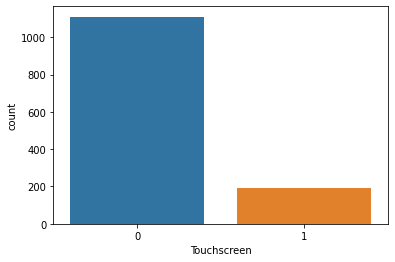

In [245]:
sns.countplot(x='Touchscreen',data=df);

on an average price of laptop with touchscreen is 1449.220942408377
on an average price of laptop without touchscreen is 1065.5215765765765


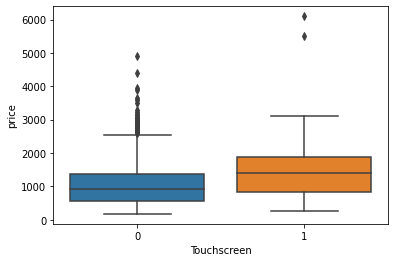

In [246]:
sns.boxplot(x='Touchscreen',y='price',data=df);
print('on an average price of laptop with touchscreen is',df.groupby('Touchscreen')['price'].mean()[1])
print('on an average price of laptop without touchscreen is',df.groupby('Touchscreen')['price'].mean()[0])

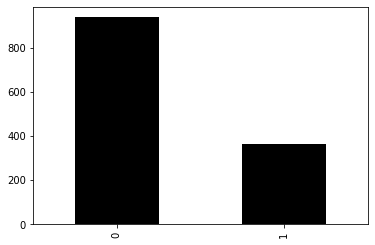

In [247]:
df['Ips_display'].value_counts().plot(kind='bar',color='black');

on an average price of laptop with IPS display is 1401.1758126721763
on an average price of laptop without IPS display is 1013.7562153518123


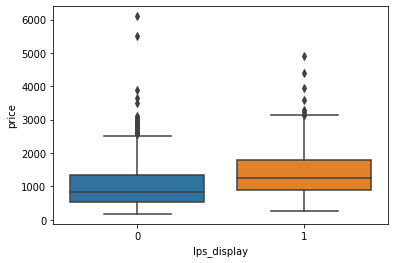

In [248]:
sns.boxplot(x=df['Ips_display'],y=df['price']);
print('on an average price of laptop with IPS display is',df.groupby('Ips_display')['price'].mean()[1])
print('on an average price of laptop without IPS display is',df.groupby('Ips_display')['price'].mean()[0])

In [249]:
df.sample()

,Company,TypeName,Inches,Ram,Memory,Weight,price,OS,cpu_comp,Gpu_comp,Touchscreen,Ips_display
126,HP,Notebook,17.3,16,512GB SSD,2.5,1271.0,Windows,IntelCorei7,Nvidia,0,0


#Dealing with memory feature

In [250]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           13
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

Create New Features for SSD,HDD,FLASH STORAGE and HYBRID

In [251]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
temp= df["Memory"].str.split("+", n = 1, expand = True)
temp

,0,1
1,128 SSD,None
2,128 Flash Storage,None
3,256 SSD,None
4,512 SSD,None
5,256 SSD,None
...,...,...
1316,128 SSD,None
1317,512 SSD,None
1318,64 Flash Storage,None
1319,1000 HDD,None


In [252]:
df["first"]= temp[0]
df["first"]=df["first"].str.strip()
df["second"]= temp[1]

In [253]:
df['first']

1                 128 SSD
2       128 Flash Storage
3                 256 SSD
4                 512 SSD
5                 256 SSD
              ...        
1316              128 SSD
1317              512 SSD
1318     64 Flash Storage
1319             1000 HDD
1320              500 HDD
Name: first, Length: 1301, dtype: object

In [254]:
df['Layer1HDD'] = df['first'].apply(lambda x: 1 if 'HDD' in x else 0)
df['Layer1SSD'] = df['first'].apply(lambda x: 1 if 'SSD' in x else 0)
df['Layer1Hybrid'] = df['first'].apply(lambda x: 1 if 'Hybrid' in x else 0)
df['Layer1Flash_Storage'] = df['first'].apply(lambda x: 1 if 'Flash Storage' in x else 0)


In [255]:
df['first'] = df['first'].str.replace(r'\D', '')
df['second'].fillna('0', inplace = True)

In [256]:
df['Layer2HDD'] = df['second'].apply(lambda x: 1 if 'HDD' in x else 0)
df['Layer2SSD'] = df['second'].apply(lambda x: 1 if 'SSD' in x else 0)
df['Layer2Hybrid'] = df['second'].apply(lambda x: 1 if 'Hybrid' in x else 0)
df['Layer2Flash_Storage'] = df['second'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

In [257]:
df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)


In [258]:
df['HDD']=(df['first']*df['Layer1HDD']+df['second']*df['Layer2HDD'])
df['SSD']=(df['first']*df['Layer1SSD']+df['second']*df['Layer2SSD'])
df['Hybrid']=(df['first']*df['Layer1Hybrid']+df['second']*df['Layer2Hybrid'])
df['Flash_Storage']=(df['first']*df['Layer1Flash_Storage']+df['second']*df['Layer2Flash_Storage'])

In [259]:
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [265]:
df.sample(5)

,Company,TypeName,Inches,Ram,Memory,Weight,price,OS,cpu_comp,Gpu_comp,Touchscreen,Ips_display,HDD,SSD,Hybrid,Flash_Storage
286,Dell,Notebook,15.6,4,1000 HDD,2.25,428.00,Others,IntelCorei3,AMD,0,0,1000,0,0,0
493,Dell,Workstation,15.6,16,512 SSD,2.17,2338.00,Windows,IntelCorei7,Nvidia,0,1,0,512,0,0
102,HP,Gaming,15.6,12,128 SSD + 1000 HDD,2.62,1249.00,Windows,IntelCorei7,Nvidia,0,1,1000,128,0,0
977,Toshiba,Ultrabook,12.5,8,512 SSD,1.10,1790.00,Windows,IntelCorei7,Intel,1,0,0,512,0,0
1062,Lenovo,Gaming,17.3,16,128 SSD + 1000 HDD,4.60,2289.99,Windows,IntelCorei7,Nvidia,0,1,1000,128,0,0


In [267]:
df.drop('Hybrid',axis=1,inplace=True)

In [268]:
df.sample()

,Company,TypeName,Inches,Ram,Memory,Weight,price,OS,cpu_comp,Gpu_comp,Touchscreen,Ips_display,HDD,SSD,Flash_Storage
1021,HP,Ultrabook,14.0,8,256 SSD,1.43,1449.0,Windows,IntelCorei7,Intel,0,0,0,256,0


In [270]:
df['Flash_Storage'].value_counts()

0      1227
32       37
64       16
256       8
16        7
128       4
512       2
Name: Flash_Storage, dtype: int64

In [271]:
df.drop('Flash_Storage',axis=1,inplace=True)

In [272]:
df.sample()

,Company,TypeName,Inches,Ram,Memory,Weight,price,OS,cpu_comp,Gpu_comp,Touchscreen,Ips_display,HDD,SSD
209,Lenovo,Gaming,15.6,16,512 SSD,2.4,1398.0,Others,IntelCorei7,Nvidia,0,0,0,512


In [274]:
df.drop('Memory',axis=1,inplace=True)

In [279]:
df.sample()

,Company,TypeName,Inches,Ram,Weight,price,OS,cpu_comp,Gpu_comp,Touchscreen,Ips_display,HDD,SSD
903,Samsung,Ultrabook,15.0,8,1.17,1699.0,Windows,IntelCorei7,Intel,0,0,0,256


In [286]:
X = df.drop(columns=['price'])
y = df['price']

In [287]:
X

,Company,TypeName,Inches,Ram,Weight,OS,cpu_comp,Gpu_comp,Touchscreen,Ips_display,HDD,SSD
1,Apple,Ultrabook,13.3,8,1.37,Mac,IntelCorei5,Intel,0,1,0,128
2,Apple,Ultrabook,13.3,8,1.34,Mac,IntelCorei5,Intel,0,0,0,0
3,HP,Notebook,15.6,8,1.86,Others,IntelCorei5,Intel,0,0,0,256
4,Apple,Ultrabook,15.4,16,1.83,Mac,IntelCorei7,AMD,0,1,0,512
5,Apple,Ultrabook,13.3,8,1.37,Mac,IntelCorei5,Intel,0,1,0,256
...,...,...,...,...,...,...,...,...,...,...,...,...
1316,Lenovo,2 in 1 Convertible,14.0,4,1.80,Windows,IntelCorei7,Intel,1,1,0,128
1317,Lenovo,2 in 1 Convertible,13.3,16,1.30,Windows,IntelCorei7,Intel,1,1,0,512
1318,Lenovo,Notebook,14.0,2,1.50,Windows,AMD,Intel,0,0,0,0
1319,HP,Notebook,15.6,6,2.19,Windows,IntelCorei7,AMD,0,0,1000,0


In [293]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1301 entries, 1 to 1320
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1301 non-null   object 
 1   TypeName     1301 non-null   object 
 2   Inches       1301 non-null   float64
 3   Ram          1301 non-null   int64  
 4   Weight       1301 non-null   float64
 5   OS           1301 non-null   object 
 6   cpu_comp     1301 non-null   object 
 7   Gpu_comp     1301 non-null   object 
 8   Touchscreen  1301 non-null   int64  
 9   Ips_display  1301 non-null   int64  
 10  HDD          1301 non-null   int64  
 11  SSD          1301 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 164.4+ KB


In [288]:
y

1       1339.69
2        898.94
3        575.00
4       2537.45
5       1803.60
         ...   
1316     638.00
1317    1499.00
1318     229.00
1319     764.00
1320     369.00
Name: price, Length: 1301, dtype: float64

In [308]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

In [309]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

#Using RandomForest

In [311]:

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,5,6,7])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))

R2 score 0.822245456122089


#Using Gradient boosting

In [310]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,5,6,7])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))


R2 score 0.8420708256086259


With more data and Using GridsearchCV we can imporve the performance of the model